In [3]:
#   lnudge = .True. nudge_test2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

path = "/home/qwertz/UCLA/uclales/Runs/AUGUST_nudge_test/" # 10
path2 = "/home/qwertz/UCLA/uclales/Runs/AUGUST_nudge_test2/" #100
path3 = "/home/qwertz/UCLA/uclales/Runs/AUGUST_nudge_test3/" #1000
path4 = "/home/qwertz/UCLA/uclales/Runs/AUGUST_nudge_test4/" #3000
path5 = "/home/qwertz/UCLA/uclales/Runs/AUGUST_nudge_test5/" #6000

dsps1 = xr.open_dataset(path+"rf01.ps.nc")
dsts1 = xr.open_dataset(path+"rf01.ts.nc")
dsps2 = xr.open_dataset(path2+"rf01.ps.nc")
dsts2 = xr.open_dataset(path2+"rf01.ts.nc")
dsps3 = xr.open_dataset(path3+"rf01.ps.nc")
dsts3 = xr.open_dataset(path3+"rf01.ts.nc")
dsps4 = xr.open_dataset(path4+"rf01.ps.nc")
dsts4 = xr.open_dataset(path4+"rf01.ts.nc")
dsps5 = xr.open_dataset(path5+"rf01.ps.nc")
dsts5 = xr.open_dataset(path5+"rf01.ts.nc")


In [20]:
import xarray as xr

###########################################
# Datensatz für ICON:

ds_iconles = xr.open_dataset("/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc")

# print(ds_iconles.coords)
# print(ds_iconles.data_vars)

##########################################
# Variablen für nudging:
zs=ds_iconles["z_mc"].isel(ncells=0).values[::-1]
Thetas=np.flip( ds_iconles["theta_v"].isel(ncells=0).sel(time=slice(20180822.0, 20180824.0)).values[::-1],  1)
qs=ds_iconles["qv"].isel(ncells=0).sel(time=slice(20180822.0, 20180824.0)).values[::-1]*1000
us=ds_iconles["u"].isel(ncells=0).sel(time=slice(20180822.0, 20180824.0)).values[::-1]
vs=ds_iconles["v"].isel(ncells=0).sel(time=slice(20180822.0, 20180824.0)).values[::-1]
icon_time = ds_iconles["time"].sel(time=slice(20180822.0, 20180824.0)).values


(20180822.0, 20180822.06944444)

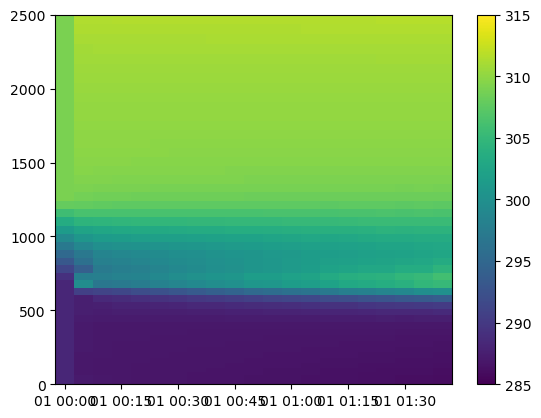

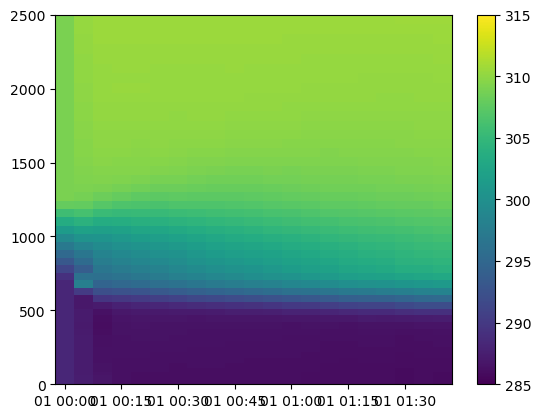

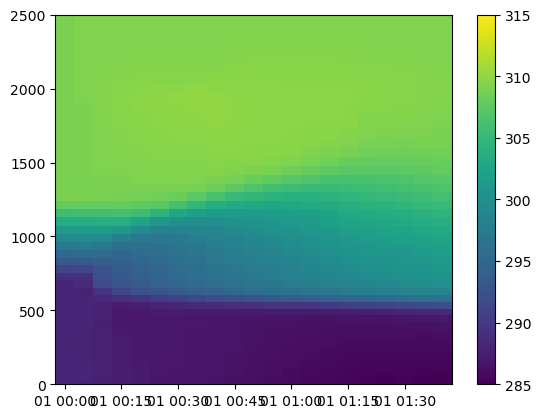

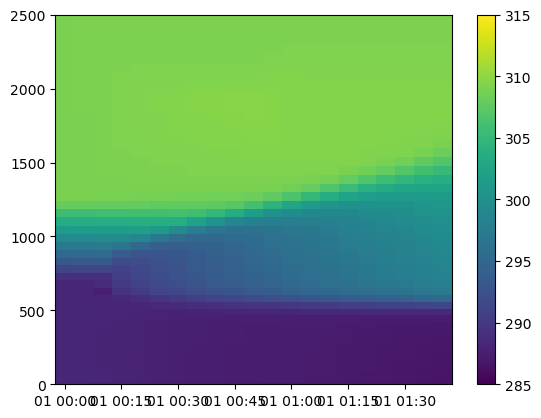

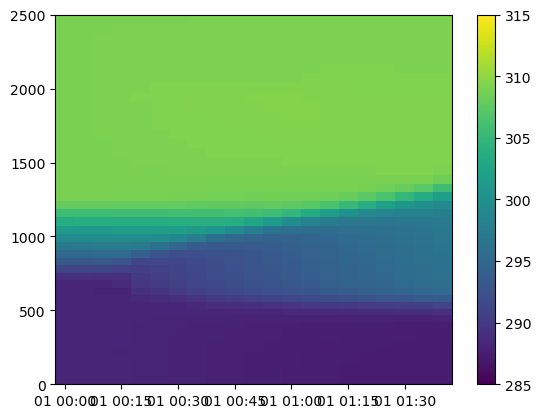

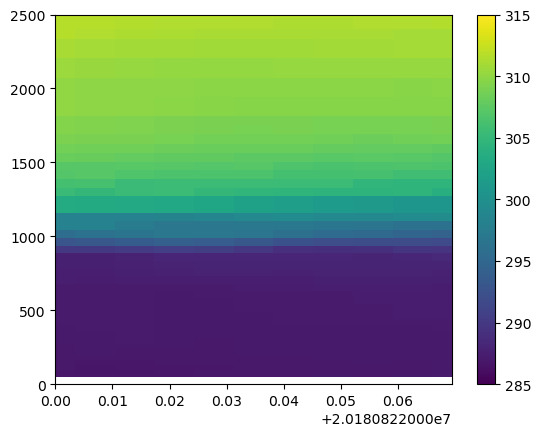

In [29]:
# nudge_test 1 + plot and comparison to nudged profile:

plt.figure()
plt.pcolormesh(dsps1["time"],dsps1["zt"],dsps1["t"].values.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()

plt.figure()
plt.pcolormesh(dsps2["time"],dsps2["zt"],dsps2["t"].values.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()

plt.figure()
plt.pcolormesh(dsps3["time"],dsps3["zt"],dsps3["t"].values.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()

plt.figure()
plt.pcolormesh(dsps4["time"],dsps4["zt"],dsps4["t"].values.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()

plt.figure()
plt.pcolormesh(dsps5["time"],dsps5["zt"],dsps5["t"].values.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()


plt.figure()
plt.pcolormesh(icon_time,zs, Thetas.T, vmin=285, vmax=315)
plt.ylim(0,2500)
plt.colorbar()
plt.xlim(20180822, 20180822.06944444)


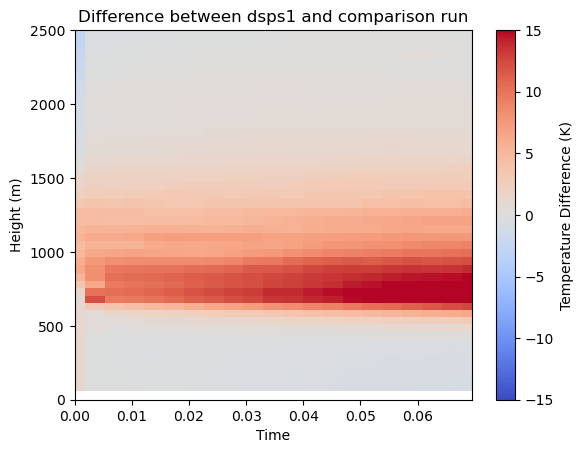

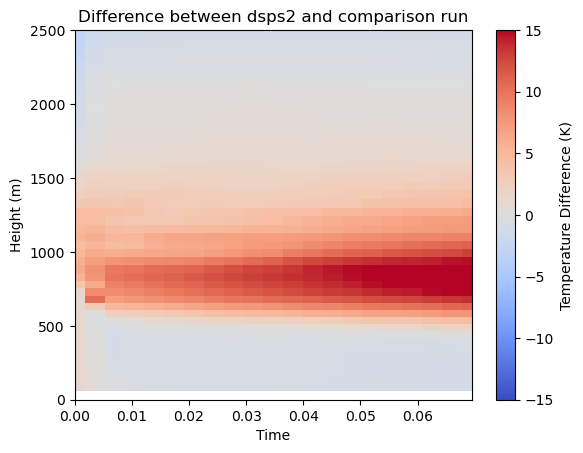

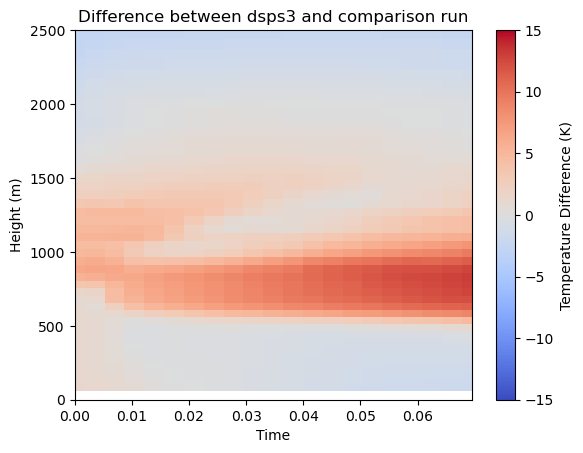

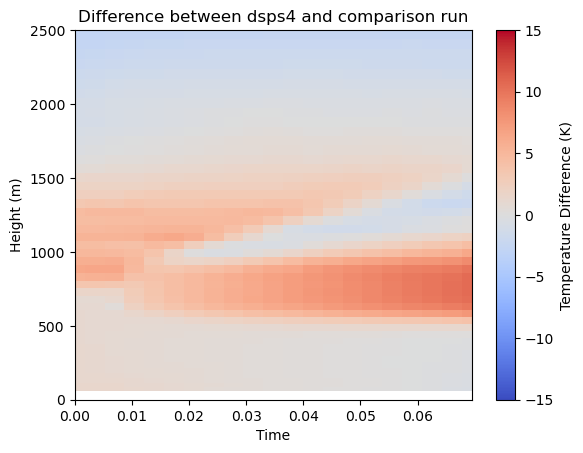

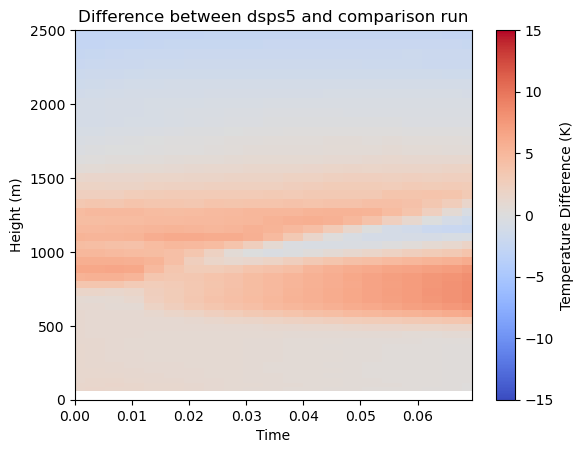

In [64]:
# Differenz plots:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vmin=-15, vcenter=0, vmax=15)

new_icon_time = icon_time - 20180822.
reference_time = np.datetime64('2000-01-01T00:00:00')
timeout = np.array([float( (value - reference_time) / np.timedelta64(1, 's'))/86400. for value in dsps1["time"].values])
time_grid, height_grid = np.meshgrid(timeout, dsps1["zt"].values)
original_points = np.array([np.repeat(new_icon_time, zs.shape[0]), np.tile(zs, icon_time.shape[0])]).T
interpolated_thetas = griddata(original_points, Thetas.flatten(), (time_grid, height_grid), method='linear')

for i, dsps in enumerate([dsps1, dsps2, dsps3, dsps4, dsps5], start=1):

    difference = dsps["t"].values.T - interpolated_thetas

    # Plot der Differenz
    plt.figure()
    plt.pcolormesh(timeout, dsps["zt"], difference, cmap='coolwarm', norm=norm) #, vmin=-5, vmax=5)
    plt.ylim(0, 2500)
    #plt.xlim(20180822, 20180822.06944444)
    plt.xlim(0, 0.06944444)
    plt.colorbar(label="Temperature Difference (K)")
    plt.title(f"Difference between dsps{i} and comparison run")
    plt.xlabel("Time")
    plt.ylabel("Height (m)")

# plt.show()

#############################################################
# Das ist doch sehr interessant...
# Ich habe das Gefühl ich brauche weitere Nudge Experimente mit häufigerer Aktualisierung der Temperaturprofile (bei mehr Zietschritten)
# Generell geht ein höheres dt_nudge hier mit geringeren positiven Temperaturabweichungen in der oberen Atmosphäre einher...
